In [4]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Assuming 'Label' is the column containing class labels
X = df.drop(columns=[' Label', 'SimillarHTTP'])
y = df[' Label']

# Encode class labels if they are not already encoded
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Calculate the number of samples in the minority class
minority_class_label = 12  # Replace with the actual label of the minority class
num_minority_samples = sum(y_train == minority_class_label)

# Set 'k_neighbors' to a value less than or equal to the number of minority class samples
k_neighbors = min(5, num_minority_samples)

# Check if k_neighbors is greater than or equal to the number of minority samples
if k_neighbors >= num_minority_samples:
    # If so, set k_neighbors to num_minority_samples - 1
    k_neighbors = num_minority_samples - 1

# Apply SMOTE to balance the class distribution in the training data
smote = SMOTE(sampling_strategy='auto', k_neighbors=k_neighbors, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Decode the predicted class labels if needed
y_pred = label_encoder.inverse_transform(y_pred)

# Generate classification report
print("Classification Report:")
print(classification_report(label_encoder.inverse_transform(y_test), y_pred))


C:\Users\user\AppData\Local\Temp\ipykernel_7472\3250117224.py:12: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")


Classification Report:


C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4512
           1       0.80      0.51      0.62     11195
           2       0.46      0.69      0.55     11661
           3       0.42      0.08      0.14     11745
           4       0.73      0.90      0.81     11343
           5       0.97      0.99      0.98      8247
           6       1.00      1.00      1.00     11940
           7       0.63      0.88      0.74     11883
           8       0.69      0.64      0.67     10868
           9       0.66      0.71      0.68     10779
          10       0.57      0.79      0.66     11756
          11       0.65      0.43      0.52     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.70    127900
   macro avg       0.66      0.66      0.64    127900
weighted avg       0.69      0.70      0.67    127900



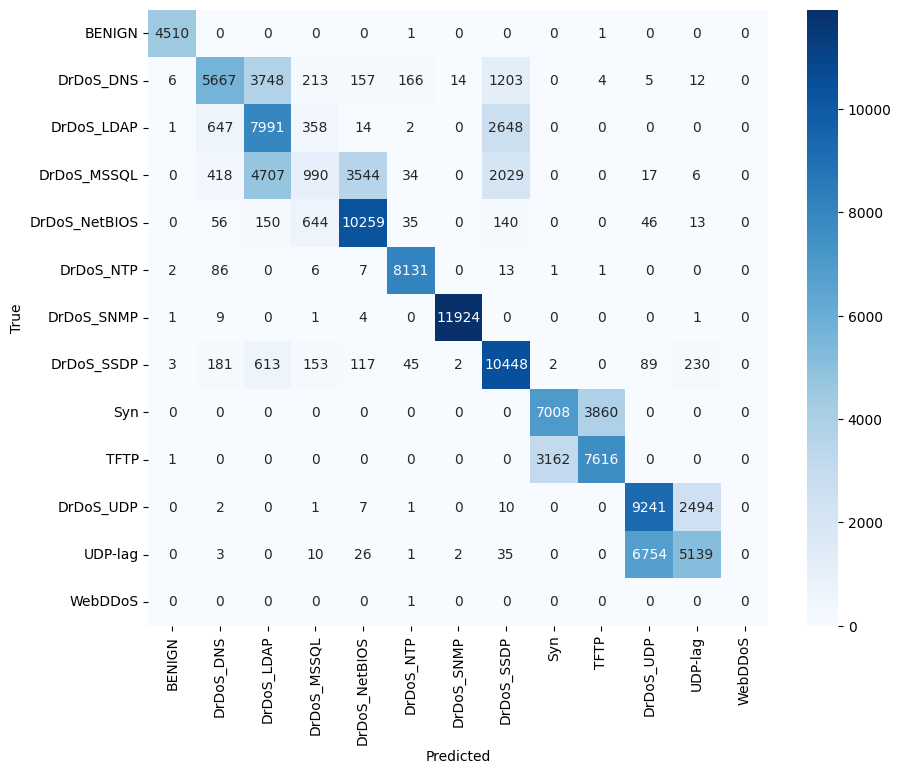

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Separate features and labels
X = data.drop(' Label', axis=1)
y = data[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
tree_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed metrics
print(classification_report(y_test, y_pred))

C:\Users\user\AppData\Local\Temp\ipykernel_7472\3493358781.py:8: DtypeWarning: Columns (67) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")


ValueError: could not convert string to float: '205.174.165.72/c.php'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define class names corresponding to the labels
class_names = [
    'BENIGN', 'DrDoS_DNS', 'DrDoS_LDAP', 'DrDoS_MSSQL',
    'DrDoS_NetBIOS', 'DrDoS_NTP', 'DrDoS_SNMP', 'DrDoS_SSDP',
    'Syn', 'TFTP', 'DrDoS_UDP', 'UDP-lag', 'WebDDoS'
]

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a printable confusion matrix table
confusion_matrix_str = "Predicted\t" + "\t".join(class_names) + "\n"
for i, row in enumerate(cm):
    confusion_matrix_str += class_names[i] + "\t" + "\t".join(map(str, row)) + "\n"

# Print the confusion matrix
print(confusion_matrix_str)


In [ ]:
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load preprocessed dataset
data = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

# Separate features and labels
X = data.drop(' Label', axis=1)
y = data[' Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)

# Set hyperparameters for the LightGBM model
params = {
    'objective': 'multiclass',
    'num_class': 13,  # (0 to 12)
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Train the LightGBM model
num_round = 100  # You can adjust this based on the training performance
bst = lgb.train(params, train_data, num_round)

# Make predictions on the test set
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert the predicted probabilities into class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report for more detailed metrics
print(classification_report(y_test, y_pred_labels))
